<a href="https://colab.research.google.com/github/igntrevor/AI-ML-School-Work/blob/main/Group_15_Question_1_Logisitic_Model_Heartdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group 15 Members**


# 1.   Moses Guloba
# 2.   Giles Mwesigye
# 3.   Ignatius Balayo


Question 1 - Logistic regression

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
from google.colab import drive
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#Reading the Heart disease prediction dataset
# Load dataset
filename = '/content/drive/MyDrive/refactory/Heart_Disease_Prediction.csv'
df = pd.read_csv(filename)


PROBLEM: PREDICTING THE PRESENCE OF HERAT DISEASE BASED ON A LIST OF CLINICAL VARIABLES.

In [8]:
# checking the columns in the datset
df.columns


Index(['index', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease'],
      dtype='object')

In [9]:
# Number of unique values in each column
df.nunique()

index                      270
Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

In [10]:
# checking the dataypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  Heart Disease            2

In [11]:
# comparing for mising values
df.isnull().sum()

index                      0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [12]:
# Duplicated data

duplicated_rows = df[df.duplicated()]

if not duplicated_rows.empty:
    print(duplicated_rows)
else:
    print("There are no duplicated rows in dataframe!")

There are no duplicated rows in dataframe!


In [13]:
columns_to_remove = ['index']

df.drop(columns_to_remove, axis=1, inplace=True)

In [14]:
# Statistical methods to describe the data
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


<Figure size 1000x1000 with 0 Axes>

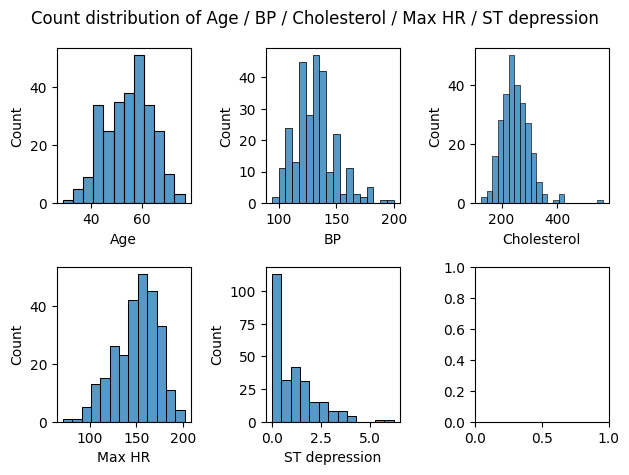

In [15]:
#Univariate analysis. NUMERIC VALUES
plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(2,3)

sns.histplot(data=df, x="Age",ax=ax[0, 0])
sns.histplot(data=df, x="BP",ax=ax[0, 1])
sns.histplot(data=df, x="Cholesterol",ax=ax[0, 2])
sns.histplot(data=df, x="Max HR",ax=ax[1, 0])
sns.histplot(data=df, x="ST depression",ax=ax[1, 1])

plt.suptitle("Count distribution of Age / BP / Cholesterol / Max HR / ST depression")
plt.tight_layout()

<Figure size 4000x4000 with 0 Axes>

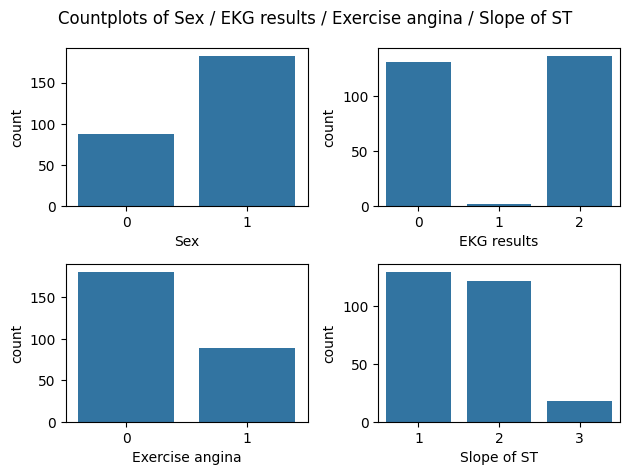

In [16]:
# UNIVARIATE ANALYSIS CAREGORICAL VALUES
plt.figure(figsize=(40, 40))

fig, ax = plt.subplots(2,2)

sns.countplot(x=df["Sex"], ax=ax[0, 0])

sns.countplot(x=df["EKG results"], ax=ax[0, 1])

sns.countplot(x=df["Exercise angina"], ax=ax[1, 0])

sns.countplot(x=df["Slope of ST"], ax=ax[1, 1])

plt.suptitle("Countplots of Sex / EKG results / Exercise angina / Slope of ST")
plt.tight_layout()

<Figure size 4000x4000 with 0 Axes>

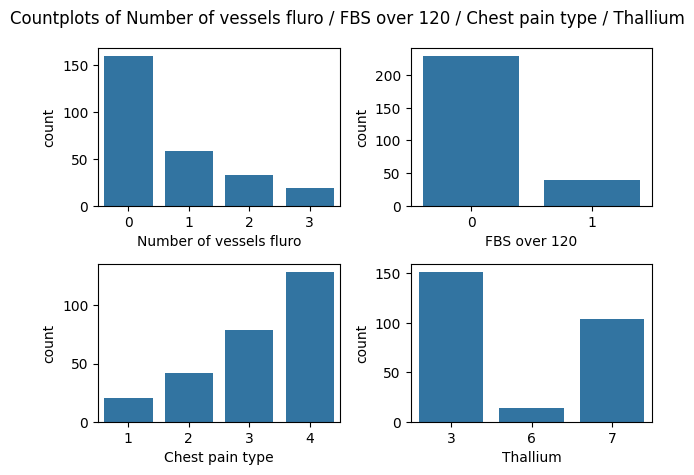

In [17]:
plt.figure(figsize=(40, 40))

fig, ax = plt.subplots(2,2)

sns.countplot(x=df["Number of vessels fluro"], ax=ax[0, 0])

sns.countplot(x=df["FBS over 120"], ax=ax[0, 1])

sns.countplot(x=df["Chest pain type"], ax=ax[1, 0])

sns.countplot(x=df["Thallium"], ax=ax[1, 1])

plt.suptitle("Countplots of Number of vessels fluro / FBS over 120 / Chest pain type / Thallium")

plt.tight_layout()

In [18]:
# Separate feature matrix and target variable
X = df.drop(columns = 'Heart Disease')
y = df['Heart Disease']
print(X.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  
0                        3         3  
1                        0         7  
2                        0         7  
3                        1      

In [20]:
# Spliiting the dat into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

X_train.shape, X_test.shape

((216, 13), (54, 13))

In [21]:
# Scaling the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [22]:
# Model training
# instantiate the model
model = LogisticRegression()


# fit the model
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred = model.predict(X_test)
y_pred

array(['Absence', 'Absence', 'Presence', 'Presence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Presence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Presence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence'], dtype=object)

In [24]:
# assessing the classification report with accuracy, recall and F1 score
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

     Absence       0.79      0.90      0.84        30
    Presence       0.85      0.71      0.77        24

    accuracy                           0.81        54
   macro avg       0.82      0.80      0.81        54
weighted avg       0.82      0.81      0.81        54



In [25]:
# Constructing the confusion matrix
confmat= confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', confmat)

print('\nTrue Positives(TP) = ', confmat[0,0])

print('\nTrue Negatives(TN) = ', confmat[1,1])

print('\nFalse Positives(FP) = ', confmat[0,1])

print('\nFalse Negatives(FN) = ', confmat[1,0])

Confusion matrix

 [[27  3]
 [ 7 17]]

True Positives(TP) =  27

True Negatives(TN) =  17

False Positives(FP) =  3

False Negatives(FN) =  7


<Axes: >

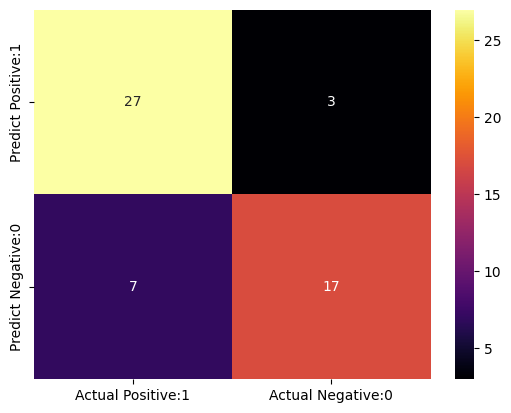

In [27]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=confmat, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='inferno')

#### HYPERPARAMETER TUNING

In [28]:
# Using C values
parameters = [{'penalty':['l1','l2']},
              {'C':[.0001, .001, .01, .1, 1, 10, 100, 1000, 10000]},
              {'solver': ['liblinear']},
              {'class_weight': [None, 'balanced'] }]



grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'recall_macro',
                           cv = 3,
                           verbose=0)


grid_search.fit(X_train, y_train)


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8427


Parameters that give the best results : 

 {'C': 0.01}


Estimator that was chosen by the search : 

 LogisticRegression(C=0.01)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver 

In [29]:
# Using elastic net penalty
parameters = [{'penalty':['elasticnet']},
              {'l1_ratio': [0.1, 0.5, 0.9]},
              {'solver': ['saga']},
              {'class_weight': [None, 'balanced']}]



grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'recall_macro',
                           cv = 3,
                           verbose=0)


grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['elasticnet']},
                         {'l1_ratio': [0.1, 0.5, 0.9]}, {'solver': ['saga']},
                         {'class_weight': [None, 'balanced']}],
             scoring='recall_macro')

In [30]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8292


Parameters that give the best results : 

 {'class_weight': 'balanced'}


Estimator that was chosen by the search : 

 LogisticRegression(class_weight='balanced')


In [31]:
# Model training
# instantiate the model
model2 = LogisticRegression(class_weight='balanced')


# fit the model
model2.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [32]:
# Predict results
y_pred = model2.predict(X_test)
y_pred

array(['Absence', 'Absence', 'Presence', 'Presence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Presence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Presence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence'], dtype=object)

In [33]:
# Evaluate performance of model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

     Absence       0.79      0.90      0.84        30
    Presence       0.85      0.71      0.77        24

    accuracy                           0.81        54
   macro avg       0.82      0.80      0.81        54
weighted avg       0.82      0.81      0.81        54



In [34]:
parameters = [{'penalty':['l1','l2']},
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = model2,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3)


grid_search.fit(X_train, y_train)

# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8287


Parameters that give the best results : 

 {'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(class_weight='balanced')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver 

In [35]:
parameters = [{'penalty':['elasticnet']},
              {'l1_ratio': [0.1, 0.5, 0.9]}]



grid_search = GridSearchCV(estimator = model2,
                           param_grid = parameters,
                           scoring = 'recall_macro',
                           cv = 3)


grid_search.fit(X_train, y_train)

# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8292


Parameters that give the best results : 

 {'l1_ratio': 0.1}


Estimator that was chosen by the search : 

 LogisticRegression(class_weight='balanced', l1_ratio=0.1)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_